In [1]:
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('final_data.csv')
df.head(15)

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,10,1,1,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10,1,2,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,10,1,4,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,10,1,8,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,10,1,16,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
5,10,1,32,0.06,0.666667,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
6,10,1,64,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
7,10,1,128,0.04,1.000000,0.001288,0.0

In [3]:
df.tail(20)

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
7020,7936,1984,2,25.70,3.552529,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7021,7936,992,3,12.86,7.099533,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7022,7936,496,4,8.74,10.446224,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7023,7936,248,5,6.58,13.875380,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7024,7936,124,6,0.72,126.805556,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7025,7936,62,7,0.59,154.745763,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7026,7936,31,8,0.84,108.690476,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7027,7936,16,9,0.63,144.

In [4]:
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.head()

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,100,10,1,0.12,1.000000,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,NVIDIA GeForce GTX TITAN X,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10,14,256,0.14,1.285714,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,100000,1,2,0.08,1.125000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.001020,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,10000,4,512,0.13,1.230769,0.001814,0.604714,0.598175,0.614112,0.000615,0.614751,0.614751,0.614751,0.229760,76.586785,0.217658,229.315172,0.003828,0.957117,0.790004,1.434818,0.000717,0.239110,0.225932,0.264997,NVIDIA GeForce RTX 2080 Ti,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,6656,416,4,0.93,6.516129,0.001517,0.000506,0.000385,0.000613,0.001251,0.001251,0.001251,0.001251,0.011615,0.003872,0.000011,0.011594,0.002794,0.000698,0.000390,0.001266,0.000060,0.000020,0.000008,0.000031,NVIDIA GeForce RTX 2080 Ti,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0


In [6]:
df.columns

Index(['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup',
       '[CUDA memcpy HtoD] Time cost', '[CUDA memcpy HtoD] Avg cost',
       '[CUDA memcpy HtoD] Min cost', '[CUDA memcpy HtoD] Max cost',
       '[CUDA memcpy DtoH] Time cost', '[CUDA memcpy DtoH] Avg cost',
       '[CUDA memcpy DtoH] Min cost', '[CUDA memcpy DtoH] Max cost',
       'cudaMalloc Time cost', 'cudaMalloc Avg cost', 'cudaMalloc Min cost',
       'cudaMalloc Max cost', 'cudaMemcpy Time cost', 'cudaMemcpy Avg cost',
       'cudaMemcpy Min cost', 'cudaMemcpy Max cost', 'cudaFree Time cost',
       'cudaFree Avg cost', 'cudaFree Min cost', 'cudaFree Max cost',
       'Device Name', 'Compute Capability', 'Total Global Memory',
       'Shared Memory per Block', 'Registers per Block', 'Warp Size',
       'Maximum Threads per Block', 'Thread Dimension Z', 'Thread Dimension Y',
       'Thread Dimension X', 'Grid Size Z', 'Grid Size Y', 'Grid Size X',
       'Clock Rate', 'Total Constant Memory', 'Multiprocessor Count',
 

In [7]:
columns = ['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup',
        '[CUDA memcpy HtoD] Avg cost',
       '[CUDA memcpy HtoD] Min cost', '[CUDA memcpy HtoD] Max cost',
        '[CUDA memcpy DtoH] Avg cost','[CUDA memcpy DtoH] Min cost', '[CUDA memcpy DtoH] Max cost',
       'cudaMalloc Avg cost', 'cudaMalloc Min cost', 'cudaMalloc Max cost', 
       'cudaMemcpy Avg cost', 'cudaMemcpy Min cost', 'cudaMemcpy Max cost', 
       'cudaFree Avg cost', 'cudaFree Min cost', 'cudaFree Max cost', 'Device Name',
       'Compute Capability', 'Total Global Memory', 'Shared Memory per Block',
       'Registers per Block', 'Warp Size', 'Maximum Threads per Block',
       'Thread Dimension Z', 'Thread Dimension Y', 'Thread Dimension X',
       'Grid Size Z', 'Grid Size Y', 'Grid Size X', 'Clock Rate',
       'Total Constant Memory', 'Multiprocessor Count', 'integrated',
       'Asynchronous Engine Count', 'Memory Bus Width', 'Memory Clock Rate',
       'L2 Cache Size', 'Maximum Threads per Multiprocessor',
       'Concurrent Kernels', 'float', 'unsigned_int', 'int', 'num_blocks',
       'num_grid', 'threads', 'cudaMalloc', 'cudaMemcpy', 'cudaFree', '+',
       'for', '-', '*', '/']

In [8]:
df = df[columns]

In [9]:
y = df['Speedup'].values
df.drop(['Speedup', 'Time'], axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Dimensions                          7040 non-null   int64  
 1   Blocks                              7040 non-null   int64  
 2   Threads                             7040 non-null   int64  
 3   [CUDA memcpy HtoD] Avg cost         7040 non-null   float64
 4   [CUDA memcpy HtoD] Min cost         7040 non-null   float64
 5   [CUDA memcpy HtoD] Max cost         7040 non-null   float64
 6   [CUDA memcpy DtoH] Avg cost         7040 non-null   float64
 7   [CUDA memcpy DtoH] Min cost         7040 non-null   float64
 8   [CUDA memcpy DtoH] Max cost         7040 non-null   float64
 9   cudaMalloc Avg cost                 7040 non-null   float64
 10  cudaMalloc Min cost                 7040 non-null   float64
 11  cudaMalloc Max cost                 7040 no

In [11]:
df['Device Name'].unique().tolist()

['NVIDIA GeForce GTX TITAN X',
 'NVIDIA GeForce GTX TITAN Z',
 'NVIDIA GeForce GTX TITAN Black',
 'NVIDIA GeForce RTX 2080 Ti',
 'NVIDIA TITAN V']

In [12]:
# oe = OrdinalEncoder()


In [12]:
oe = pickle.load(open('utils/gpu_encoder.pickle', 'rb'))

In [15]:
gpus = oe.fit_transform(df['Device Name'].values.reshape(-1, 1))
df['Device Name'] = gpus

In [16]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,100,10,1,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.086266,0.000202,0.258384,0.001753,0.001247,0.003230,0.000354,0.000283,0.000390,1.0,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10,14,256,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.074917,0.000215,0.224311,0.003514,0.002920,0.005266,0.000430,0.000265,0.000513,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,100000,1,2,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.059715,0.000112,0.178915,0.001020,0.000525,0.002445,0.000313,0.000156,0.000394,0.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,10000,4,512,0.604714,0.598175,0.614112,0.614751,0.614751,0.614751,76.586785,0.217658,229.315172,0.957117,0.790004,1.434818,0.239110,0.225932,0.264997,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,6656,416,4,0.000506,0.000385,0.000613,0.001251,0.001251,0.001251,0.003872,0.000011,0.011594,0.000698,0.000390,0.001266,0.000020,0.000008,0.000031,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0


In [15]:
# with open('utils/gpu_encoder.pickle', 'wb') as ge:
#     pickle.dump(oe, ge)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

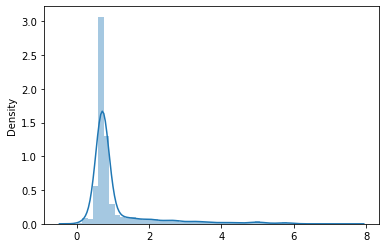

In [16]:
sns.distplot(np.log1p(y))

In [17]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,100,2,32,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.059715,0.000112,0.178915,0.001020,0.000525,0.002445,0.000313,0.000156,0.000394,0.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,1000000,6,128,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.074917,0.000215,0.224311,0.003514,0.002920,0.005266,0.000430,0.000265,0.000513,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,1000,15,512,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.074917,0.000215,0.224311,0.003514,0.002920,0.005266,0.000430,0.000265,0.000513,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,1000000,4,32,0.604714,0.598175,0.614112,0.614751,0.614751,0.614751,76.586785,0.217658,229.315172,0.957117,0.790004,1.434818,0.239110,0.225932,0.264997,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,100000,14,1024,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.059715,0.000112,0.178915,0.001020,0.000525,0.002445,0.000313,0.000156,0.000394,0.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0


In [17]:
X = df.values

In [18]:
df.columns

Index(['Dimensions', 'Blocks', 'Threads', '[CUDA memcpy HtoD] Avg cost',
       '[CUDA memcpy HtoD] Min cost', '[CUDA memcpy HtoD] Max cost',
       '[CUDA memcpy DtoH] Avg cost', '[CUDA memcpy DtoH] Min cost',
       '[CUDA memcpy DtoH] Max cost', 'cudaMalloc Avg cost',
       'cudaMalloc Min cost', 'cudaMalloc Max cost', 'cudaMemcpy Avg cost',
       'cudaMemcpy Min cost', 'cudaMemcpy Max cost', 'cudaFree Avg cost',
       'cudaFree Min cost', 'cudaFree Max cost', 'Device Name',
       'Compute Capability', 'Total Global Memory', 'Shared Memory per Block',
       'Registers per Block', 'Warp Size', 'Maximum Threads per Block',
       'Thread Dimension Z', 'Thread Dimension Y', 'Thread Dimension X',
       'Grid Size Z', 'Grid Size Y', 'Grid Size X', 'Clock Rate',
       'Total Constant Memory', 'Multiprocessor Count', 'integrated',
       'Asynchronous Engine Count', 'Memory Bus Width', 'Memory Clock Rate',
       'L2 Cache Size', 'Maximum Threads per Multiprocessor',
       'Concurr

In [20]:
#sc = RobustScaler()
# sc = MinMaxScaler()
# X_scaled = sc.fit_transform(X)

In [20]:
sc = pickle.load(open('utils/min_max_scaler.pickle', 'rb'))
X_scaled = sc.transform(X)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.1, random_state = 42)

In [22]:
def evaluate_model(model, X_train, y_train, X_val, y_val, metric='R2'):
    model.fit(X_train, y_train)
    if metric == 'RMSE':
        y_pred_train = model.predict(X_train)
        print('Training RMSE score = {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
        y_pred = model.predict(X_val)
        print('Validation RMSE score = {}'.format(np.sqrt(mean_squared_error(y_val, y_pred))))
    else:
        print('Training R2 score = {}'.format(model.score(X_train, y_train)))
        print('Validation R2 score = {}'.format(model.score(X_val, y_val)))

In [23]:
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(lr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 35.189835094626474
Validation RMSE score = 27.152420432208924
Training R2 score = 0.2179567502971569
Validation R2 score = 0.29969809961168714


In [24]:
lasso = Lasso()
evaluate_model(lasso, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(lasso, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 37.65279408809155
Validation RMSE score = 29.85080679489916
Training R2 score = 0.10465435209017304
Validation R2 score = 0.1535908442218008


In [25]:
ridge = Ridge()
evaluate_model(ridge, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(ridge, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 36.533179136965586
Validation RMSE score = 28.937978784816035
Training R2 score = 0.15710934059032078
Validation R2 score = 0.20456518902478116


In [26]:
svr = SVR()
evaluate_model(svr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(svr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 39.19412423017421
Validation RMSE score = 31.784922561023777
Training R2 score = 0.02985145191252958
Validation R2 score = 0.04035518569268204


In [27]:
lsvr = LinearSVR()
evaluate_model(lsvr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(lsvr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 39.45361945143325
Validation RMSE score = 32.08224761674423
Training R2 score = 0.016883421998274972
Validation R2 score = 0.022206694886849676


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [28]:
xgb = XGBRegressor(n_estimators = 150)
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 0.4263638275271017
Validation RMSE score = 9.467163740040096
Training R2 score = 0.9998851960018695
Validation R2 score = 0.9148650309314633


In [29]:
mlp = MLPRegressor(hidden_layer_sizes=(320,5))
evaluate_model(mlp, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(mlp, X_train, y_train, X_val, y_val, 'R2')

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training RMSE score = 30.901941654663098
Validation RMSE score = 23.691864825957854
Training R2 score = 0.3486625737789224
Validation R2 score = 0.4283502139029134


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth = 15)
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 9.873007396717396
Validation RMSE score = 8.516589471867604
Training R2 score = 0.9409311848915607
Validation R2 score = 0.9325174705982566


In [31]:
with open('random_forest_model.pickle', 'wb') as f:
    pickle.dump(rfr, f)

In [32]:
with open('utils/min_max_scaler.pickle', 'wb') as f:
    pickle.dump(sc, f)

In [33]:
y_pred = rfr.predict(X_val)

In [34]:
y_pred[10]

1.000494454306069

In [35]:
y_val[10]

1.25

In [36]:
# rfe = RFE(rfr)
# rfe = rfe.fit(X_train, y_train)
# columns = [df.columns.tolist()[i] for i in range(len(df.columns.tolist())) if rfe.support_[i]]

In [23]:
model = pickle.load(open('random_forest_model.pickle', 'rb'))

In [24]:
y_pred = model.predict(X_val)

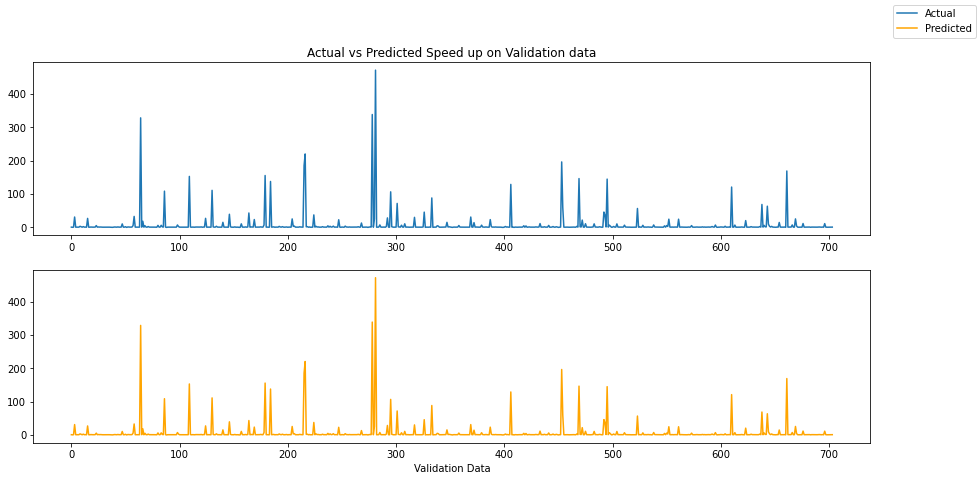

In [25]:
fig, axes = plt.subplots(2, 1, figsize = (15, 7))
axes[0].set_title('Actual vs Predicted Speed up on Validation data')
axes[0].plot(y_val, label = 'Actual')
axes[1].plot(y_val, label = 'Predicted', color = 'orange')
axes[1].set_xlabel('Validation Data')
fig.legend()
plt.savefig('validation_speedup_both.pdf')